In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Employee_Attrition_Data.csv")
print("First 5 records:")
print(df.head())

First 5 records:
   Employee_ID  Age  Monthly_Income  Job_Satisfaction  Performance_Rating  \
0            1   28           30000                 4                   3   
1            2   45           50000                 2                   2   
2            3   34           40000                 3                   4   
3            4   29           32000                 1                   2   
4            5   40           45000                 4                   3   

   Work_Life_Balance  Years_At_Company  Attrition  
0                  3                 2          0  
1                  2                10          1  
2                  3                 6          0  
3                  1                 3          1  
4                  4                 9          0  


In [3]:
# Step 3: Preprocessing
df = df.dropna()

# Define features and target
X = df[["Age", "Monthly_Income", "Job_Satisfaction", "Performance_Rating", "Work_Life_Balance", "Years_At_Company"]]
y = df["Attrition"]

# Step 4: Scale Numeric Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [4]:
# Step 6: Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy: 1.0


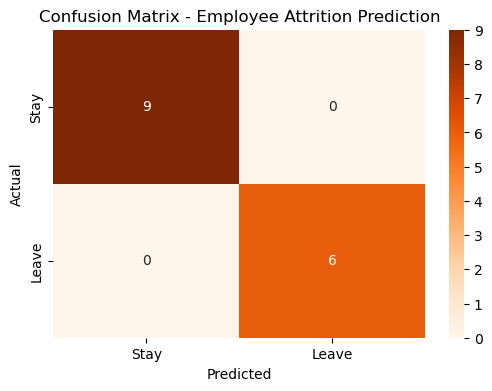

In [5]:
# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Stay", "Leave"],
            yticklabels=["Stay", "Leave"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Employee Attrition Prediction")
plt.show()

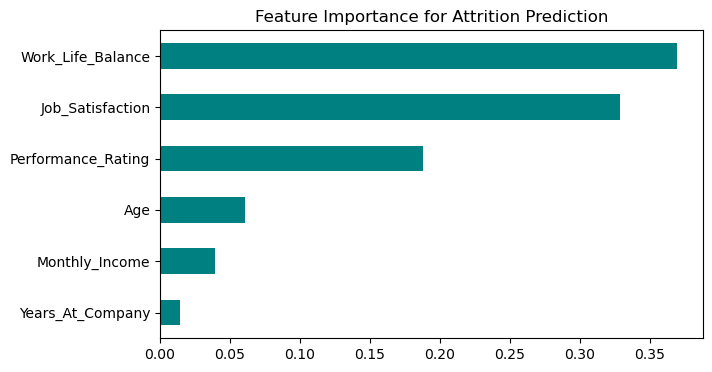

In [6]:

# Step 9: Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal', figsize=(7,4))
plt.title("Feature Importance for Attrition Prediction")
plt.show()


In [8]:
# Step 10: Predict Attrition for a New Employee
new_employee = pd.DataFrame({
    "Age": [28],
    "Monthly_Income": [32000],
    "Job_Satisfaction": [2],
    "Performance_Rating": [3],
    "Work_Life_Balance": [2],
    "Years_At_Company": [2]
})

new_scaled = scaler.transform(new_employee)
attr_prob = rf_model.predict_proba(new_scaled)[0][1]
pred_class = rf_model.predict(new_scaled)[0]

print(f"\nPredicted Attrition Probability: {attr_prob*100:.2f}%")
print("Predicted Class:", "Leave" if pred_class==1 else "Stay")


Predicted Attrition Probability: 84.00%
Predicted Class: Leave
